# What to do:
 - Familiarize yourself with similarity between feature vectors (mainly Tanimoto), though you probably know it already :)
 - Implement for yourself a function that measures Tanimoto similarity between two binary vectors, and try it out.
 - Do a similarity search of your ligands within the DrugBank database using using hashed fingerprints (ECFP). Are any of your ligands significantly structurally similar to any DrugBank compounds? How many?
 - Do you think that some substances similar to your known ligands were already considered or even applied for therapeutic purposes?
 - Implement for yourself a function that measures Tanimoto dissimilarity for the purposes of diversity picking.
 - Perform diversity picking on your ligand set, i.e. use the diversity picker to select a small representative subset of mutually dissimilar structures that cover as much of the chemical diversity of your ligand set as possible. Pick at least 20 representative structures, or around 1% of your ligand set size, whichever one is greater. Visualize the picked structures.
 - Does each next picked structure differ considerably from the previously picked ones, or is the subset limited to only few structural motifs? What would the latter mean?

# Zadání:
 - Seznamte se s podobností mezi vektory features (hlavně Tanimoto), i když to už asi víte :)
 - Implementujte sami funkci, která měří podobnost Tanimota mezi dvěma binárními vektory, a vyzkoušejte ji.
 - Proveďte similarity search na svých ligandech s databázi DrugBank pomocí hašovaných fingerprintů (ECFP). Jsou některé z vašich ligandů významně strukturálně podobné jakýmkoli sloučeninám DrugBank? Kolik?
 - Myslíte si, že některé látky podobné vašim známým ligandům již byly zváženy nebo dokonce použity pro terapeutické účely?
 - Implementujte pro sebe funkci, která měří odlišnost Tanimota pro účely výběru rozmanitosti.
 - Proveďte výběr diverzity na vaší sadě ligandů, tj. Použijte výběr diverzity k výběru malé reprezentativní podmnožiny vzájemně odlišných struktur, které pokrývají co nejvíce chemické rozmanitosti vaší sady ligandů. Vyberte alespoň 20 reprezentativních struktur nebo přibližně 1% velikosti sady ligandů, podle toho, která z nich je větší. Vizualizujte vybrané struktury.
 - Liší se každá další vybraná struktura značně od dříve vybraných, nebo je podmnožina omezena pouze na několik strukturních motivů? Co by to znamenalo?

# Strukturní podobnost

V předchozích dvou cvičeních jsme charakterizovali chemické struktury pomocí binárních vektorů představujících jejich vlastnosti: buď přímo (strukturální klíče jako MACCS) nebo v hašované podobě (hašované fingerprinty jako ECFP). Kromě zúžení vyhledávání substruktury nebo vyhledávání konkrétních fragmentů lze tyto binární vektory features použít ke kvantifikaci strukturní podobnosti. To je založeno na předpokladu, že struktury s podobnými vektory vlastností musí být samy strukturně podobné. Může to znít trochu útržkovitě, ale jak uvidíte, funguje to docela dobře, zejména s fingerprinty, jako je ECFP.

Tím se dostáváme k otázce, jak měřit podobnost binárních vektorů. Naštěstí je to již docela obecná otázka, na které se intenzivně pracovalo dlouho předtím, než byla cheminformatika věcí. Pravděpodobně nejjednodušší a rozhodně nejčastěji používaný v cheminformatice je [Tanimoto similarity](https://en.wikipedia.org/wiki/Jaccard_index) nebo také Jaccardův index.

Koeficient podobnosti Tanimoto je měřítkem toho, kolik features mají dva porovnávané features vectors společné, ve srovnání s tím, kolik features mají celkově. To znamená, že features vectors, které sdílejí všechny features, tj. jsou zcela identické, budou mít Tanimotův koeficient 1. Vektory prvků, které vůbec nesdílejí žádné features, mají Tanimotův koeficient 0 a všechny ostatní případy budou někde mezi těmito dvěma mezními hodnotami. Mnohem více informací je na wiki articel, nemá smysl při kopírování :) Další opatření jako [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) nebo [Dice coefficient](https://en.wikipedia.org/wiki/Dice%27s_coefficient) jsou také často implementovány v cheminformatických sadách nástrojů, připravených k použití pro některé hraniční případy. Poměrně málo je popsáno v [Daylight documentation](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html), 
oddíl 6.3. Tanimoto je však do značné míry vanilkou binárních vektorových srovnání. Pojďme to implementovat:

In [30]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import csv
import pandas as pd

**Načtení množiny ligandů pro COX1**

In [31]:
raw_df = pd.read_csv('data/cyclooxygenase_1.csv', sep=';') 
raw_df.head()

# odstraneni dat, ktere nemaji IC50 nebo maji jinou jednotku nez nM,
# tim se odstrani data, ktere nemaji Smiles
df = raw_df[(raw_df['Standard Units'] == 'nM')]
cox_ligands = [Chem.MolFromSmiles(smiles) for smiles in df['Smiles']]

**Načtení množiny DrugBank**

In [32]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [15:52:05] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:53:00] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [15:53:00] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:53:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:53:00] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [15:53:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:53:00] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [15:53:00] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [15:53:00] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [15:53:00] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit 

RDKit ERROR: [15:53:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:53:01] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [15:53:01] ERROR: Could not sanitize molecule ending on line 519056
RDKit ERROR: [15:53:01] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [15:53:01] Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [15:53:01] ERROR: Could not sanitize molecule ending on line 541262
RDKit ERROR: [15:53:01] ERROR: Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [15:53:01] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [15:53:01] ERROR: Could not sanitize molecule ending on line 557517
RDKit ERROR: [15:53:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [15:53:01] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit E

In [33]:
# let's define the Tanimoto similarity for ourselves:
# poměr počtu sdílených atributů k počtu atributů, které ma vektor1 nebo vektor2
# set bits to jsou bity, kdy pokud ma alespon jedna molekula 1/atribut, tak se da + 1
# shared bits to je pocet sdilenych bitu
def tanimoto(vector1, vector2):
    set_bits = 0
    shared_bits = 0
    for bit1, bit2 in zip(vector1, vector2):
        if bit1 or bit2: # at least one vector has this feature
            set_bits += 1
            if bit1 and bit2: # both vectors have this feature
                shared_bits += 1
    return shared_bits / set_bits

# and check our implementation on several vectors
print(tanimoto([1, 1, 0, 0], [0, 0, 1, 1])) # share nothing
print(tanimoto([0, 1, 1, 0], [1, 0, 1, 0])) # share bit of 3
print(tanimoto([1, 1, 1, 1], [0, 0, 1, 1])) # share 2 bits of 4
print(tanimoto([1, 1, 1, 1], [0, 1, 1, 1])) # share 3 bits of 4
print(tanimoto([1, 1, 0, 0], [1, 1, 0, 0])) # share 2 bits of 2

0.0
0.3333333333333333
0.5
0.75
1.0


Tato implementace se zdá být v pořádku pro naše malé 4bitové vektory. Zkusme to na některých skutečných vektorech fingerprintů :)

In [34]:
from rdkit.Chem import MACCSkeys
fp1 = MACCSkeys.GenMACCSKeys(drugs[123])
fp2 = MACCSkeys.GenMACCSKeys(drugs[666])
print(fp1.ToBitString())
print(fp2.ToBitString())

00000000000000000000000000000000000000000000000000000100000000000000000000000000000010000100000001000000000000000100000000010001000101010001000110100011101011110111110
00000000000000000000000000000010000000000000000001000000010000000000000000100000000001100000010100101100010011011101101000110110000010000110010011111100111111111111110


In [35]:
tanimoto(fp1, fp2)

0.25

Takže naše implementace podobnosti ghetta tanimoto funguje také na klíčích MACCS. Naštěstí nemusíme implementovat metriky podobnosti samy - mnoho z nich je [již implementováno v RDKit](https://www.rdkit.org/docs/source/rdkit.DataStructs.cDataStructs.html):

In [36]:
from rdkit import DataStructs

In [37]:
DataStructs.TanimotoSimilarity(fp1, fp2) # same result as our own implementation :)

0.25

Nyní, když máme naši Tanimotovu podobnost vyzkoušenou a otestovanou jak pro umělý malý vektor, tak i pro některé skutečné fingerprinty, vypočítejme MACCS klíče pro všechny naše ligandy a všechny naše známé léky. Pak můžeme zkusit základní hledání podobnosti:

In [38]:
cox_ligands_maccs = [MACCSkeys.GenMACCSKeys(m) for m in cox_ligands]
drugs_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]

Pojďme implementovat základní funkci hledání podobnosti. Vezmeme jeden binární vektor jako dotaz, porovnáme všechny binární vektory v zadané prohledávané sadě. Pokud jeho Tanimotova podobnost vektoru dotazu s některým z prohledávaných fingerprintů dosáhne nebo překročí naši nastavenou mezní hodnotu (0,8 je obvykle tam, kde se při použití standardních typů ECFP začíná vyskytovat znatelná podobnost), připojí se index nalezeného podobného vektoru k výsledky.

In [39]:
def similarity_search(query_fp, searched_fp_set, cutoff=0.8):
    # we have no index, so we will have to just iterate through the entire searched set
    hits = []
    for i, fp in enumerate(searched_fp_set):
        similarity = DataStructs.TanimotoSimilarity(query_fp, fp)
        if similarity >= cutoff: # similar enough for consideration
            hits.append((i, similarity))
    return sorted(hits, key=lambda x: x[1], reverse=True) # stronger hits first

Přesně tohle je ve velké módě, dělají to velké, často komerční chemické databáze, když uživatelé provádějí vyhledávání podobnosti. Jejich vstupní struktura dostane fingerprinty, výsledný fingerprint ve srovnání s těmi v databázi a molekuly s podobnými fingerprinty budou vráceny jako hity. Samozřejmě dělají rozšířené indexování a heuristiku, aby vyhledávání bylo rychlejší, spolu s určitým přeuspořádáním hitů a sanitací, ale základní princip je stejný: vytvořit fingerprint dotazu, porovnat s fingerprinty databáze pomocí nějaké metriky podobnosti, vrátit hity nad prahovou hodnotu. Same sh.t, different toilet :)

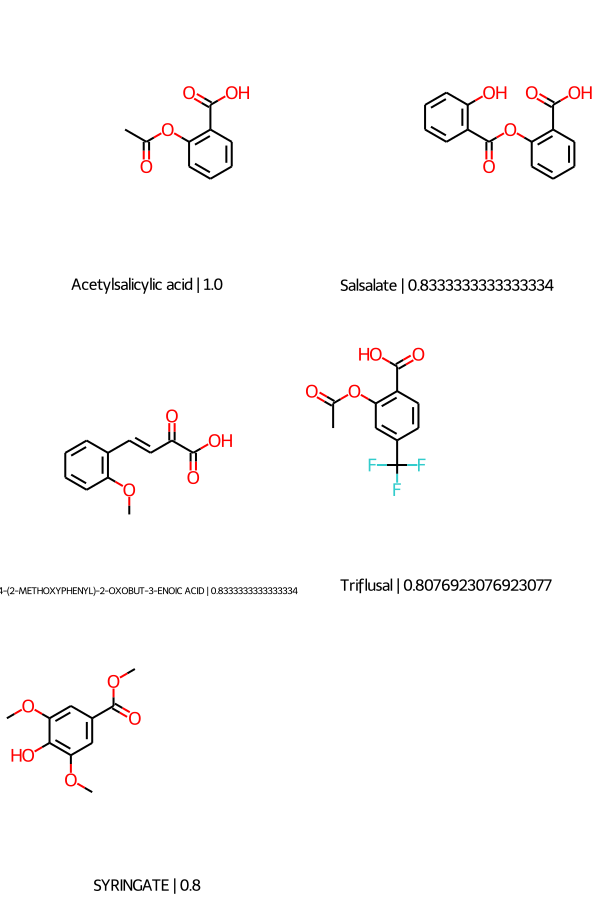

In [40]:
# let's use our similarity search method to search of aspirin in drugs.
# There should be some hits :)
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin_fp = MACCSkeys.GenMACCSKeys(aspirin)
hits = similarity_search(aspirin_fp, drugs_maccs)
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=["{} | {}".format(drugs[hit[0]].GetProp('GENERIC_NAME'), hit[1]) for hit in hits])

Našli jsme kyselinu acetylsalicylovou (tj. Aspirin) jako přesnou shodu (tanimoto 1.0) a čtyři další zdánlivě docela podobné struktury. Zdá se, že naše hledání podobnosti funguje :) zkusme vyhledat nějakou molekulu z našeho ligandu nastaveného v DrugBank:

True
i = 4
# hits =  1


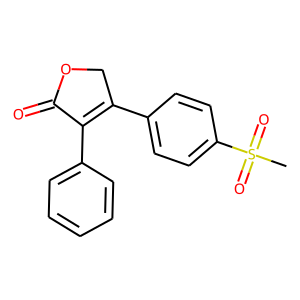

True
i = 6
# hits =  2


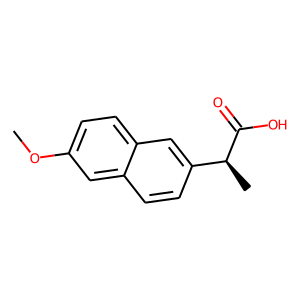

True
i = 29
# hits =  9


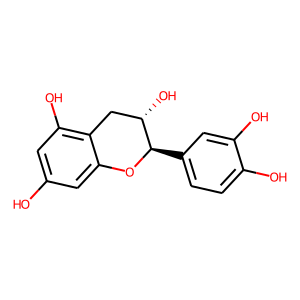

True
i = 125
# hits =  12


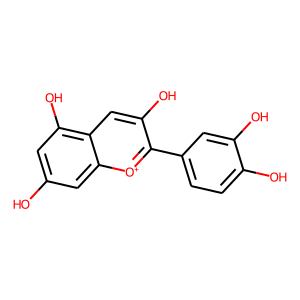

True
i = 171
# hits =  13


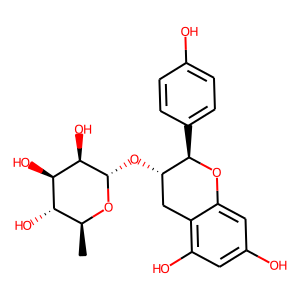

True
i = 300
# hits =  15


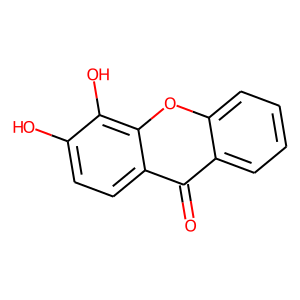

True
i = 390
# hits =  41


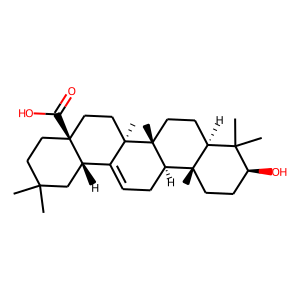

In [41]:
# nalezeni, ktera molekula z me mnoziny podobna nekterym latkam z drugbanku
length = 0
for i in range(len(cox_ligands_maccs)):
    hits = similarity_search(cox_ligands_maccs[i], drugs_maccs)
    if(length<len(hits)):
        length=len(hits)
        # kontrola, jestli sedi pozicne, ale mely by
        print(MACCSkeys.GenMACCSKeys(cox_ligands[i]) == cox_ligands_maccs[i])
        print('i =',i)
        print('# hits = ',len(hits))
        display(Chem.Draw.MolToImage(cox_ligands[i]))

In [42]:
# vyberu si molekulu na pozici 300
hits = similarity_search(cox_ligands_maccs[300], drugs_maccs)
hits

[(5648, 0.9642857142857143),
 (1945, 0.9310344827586207),
 (2083, 0.9310344827586207),
 (3749, 0.9310344827586207),
 (5895, 0.9310344827586207),
 (6073, 0.9310344827586207),
 (6653, 0.9),
 (1615, 0.896551724137931),
 (1429, 0.8620689655172413),
 (5619, 0.8620689655172413),
 (6482, 0.8571428571428571),
 (3183, 0.8275862068965517),
 (4792, 0.8214285714285714),
 (3387, 0.8125),
 (4829, 0.8)]

In [43]:
# zaznamenani cisel pro drugBank mnozinu
drug_hits = [hit[0] for hit in hits]
print(len(drug_hits))
drug_hits

15


[5648,
 1945,
 2083,
 3749,
 5895,
 6073,
 6653,
 1615,
 1429,
 5619,
 6482,
 3183,
 4792,
 3387,
 4829]

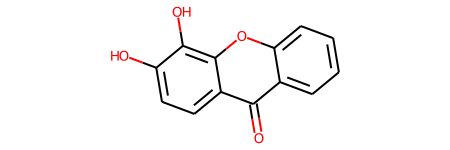

In [44]:
cox_ligands[300]

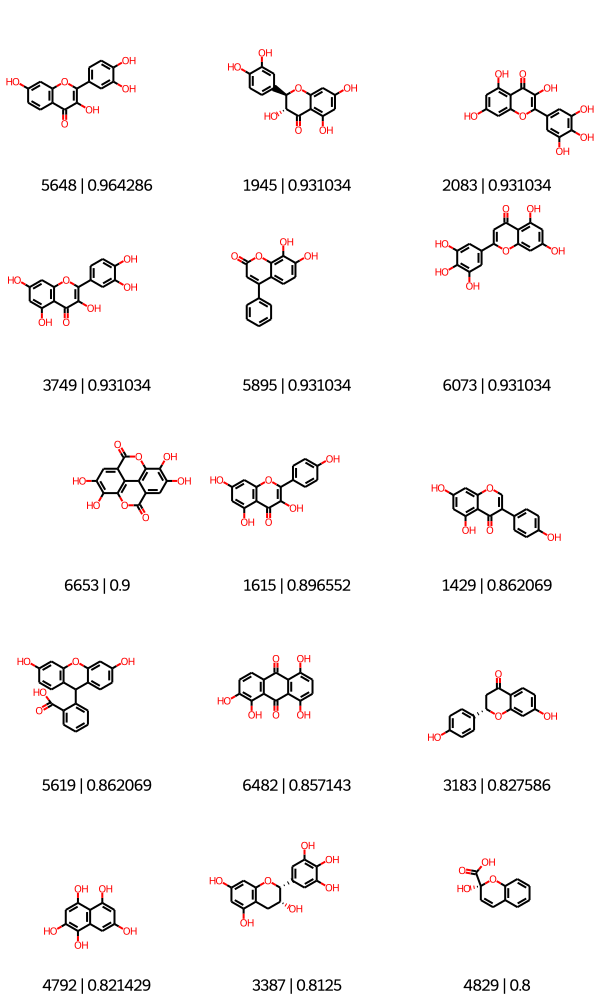

In [45]:
# the hits among Drugbank using MACCS keys
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits], legends=["{} | {}".format(hit[0], round(hit[1],6)) for hit in hits])

Vybraný ligand z množiny cox měl 15 hitů s množinou DrugBank na zvoleném prahu podobnosti 0.8. I když ta podobnost není úplně skvělá, bere to hodně obecně mi přijde, ta molekula, kterou jsem dala jako templát má 3 kruhy a dva z nich jsou aromatické, u většiny nalezených molekul z Drugbanku buď nemá třetí kruh nebo je navázán přes vazbu. Není až tak přesný, alespoň pokud jde o vlastnosti MACCS.

Pojďme udělat stejný přesný dotaz, ale s použitím ECFP místo MACCS:

In [46]:
cox_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                     for m in cox_ligands]
drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
              for m in drugs]

In [47]:
hits = similarity_search(cox_ligands_ecfp[300], drugs_ecfp)
hits

[]

Žádná shoda podobnosti pomocí ECFP. Podívejme se, jaká je podobnost založená na ECFP se dvěma předchozími zásahy založenými na MACCS:

In [48]:
# projdeme postupne vsechny hity, ktere byly pro nami zvolenou molekulu s DrugBank, ktere to naslo
for drug_n in drug_hits:
    similarity = DataStructs.TanimotoSimilarity(cox_ligands_ecfp[0], drugs_ecfp[drug_n])
    print(drug_n,' = ',similarity)

5648  =  0.14285714285714285
1945  =  0.12121212121212122
2083  =  0.15
3749  =  0.14285714285714285
5895  =  0.14754098360655737
6073  =  0.13114754098360656
6653  =  0.17307692307692307
1615  =  0.14754098360655737
1429  =  0.14754098360655737
5619  =  0.12698412698412698
6482  =  0.17647058823529413
3183  =  0.1111111111111111
4792  =  0.14
3387  =  0.12903225806451613
4829  =  0.08196721311475409


Stejné molekuly v dotazu, stejné měření podobnosti, ale jiný typ features vector přinesl velmi odlišné výsledky. Podobných struktur v DrugBanku s naší molekulou bylo přesně 15 a při similarity search založené na ECFP je mnohem nižšín ež dříve. Dříve nám to hlásilo podobnost větší než 0,8 a teď se dostaneme nejvíce tak na 0,176.

Je to proto, že MACCS a ECFP jsou zcela odlišné v tom, jaké strukturní vlastnosti pokrývají. Při použití vyhledávání podobnosti založeného na fingerprintech je vždy dobré se trochu zamyslet nad tím, jaké strukturní prvky představují použité fingerprinty, a tedy, co se používá jako základ strukturní podobnosti. Také je vhodné zahrnout informace o přesně použitém typu features vector (např. MACCS, ECFP6-1024 bit, ECFP4-512 bit atd.) A přesně použité metodě měření podobnosti (např. Tanimoto, Manhattan), kdykoli představíte jakýkoli výsledky hledání podobnosti.

Vyhledejme všechny naše ligandy v databázi DrugBank, abychom zjistili, jak blízko jsme známým drugs:

In [49]:
cox_ligands_queries = [(i, similarity_search(ligand_ecfp, drugs_ecfp))
                     for i, ligand_ecfp in enumerate(cox_ligands_ecfp)]
cox_ligands_queries

[(0, []),
 (1, []),
 (2, []),
 (3, []),
 (4, [(418, 1.0)]),
 (5, []),
 (6, [(671, 1.0)]),
 (7, []),
 (8, []),
 (9, [(928, 1.0), (6929, 1.0)]),
 (10, []),
 (11, []),
 (12, []),
 (13, []),
 (14, []),
 (15, []),
 (16, []),
 (17, []),
 (18, []),
 (19, []),
 (20, []),
 (21, []),
 (22, []),
 (23, [(218, 1.0), (5831, 0.8)]),
 (24, []),
 (25, []),
 (26, []),
 (27, []),
 (28, []),
 (29, []),
 (30, []),
 (31, []),
 (32, []),
 (33, []),
 (34, []),
 (35, []),
 (36, []),
 (37, []),
 (38, []),
 (39, []),
 (40, []),
 (41, []),
 (42, []),
 (43, []),
 (44, [(369, 1.0)]),
 (45, []),
 (46, []),
 (47, []),
 (48, []),
 (49, []),
 (50, []),
 (51, []),
 (52, []),
 (53, []),
 (54, []),
 (55, []),
 (56, []),
 (57, []),
 (58, []),
 (59, []),
 (60, []),
 (61, []),
 (62, []),
 (63, []),
 (64, []),
 (65, []),
 (66, []),
 (67, []),
 (68, []),
 (69, []),
 (70, []),
 (71, []),
 (72, []),
 (73, []),
 (74, []),
 (75, []),
 (76, []),
 (77, []),
 (78, []),
 (79, []),
 (80, []),
 (81, []),
 (82, []),
 (83, []),
 (84, []),

Pro každý ligand máme seznam drugs, které odpovídají jejich strukturním vlastnostem (ECFP4, 1024bit) při podobnosti Tanimoto 0,8 a vyšší. Většina dotazů je prázdná při této hranici podobnosti 0,8, ale existují některé skutečné hity:

In [50]:
# only take ligands that actually matched something in DrugBank
cox_ligand_hits = [hit for hit in cox_ligands_queries if hit[1]]
for i in range(len(cox_ligand_hits)):
    print(i,cox_ligand_hits[i])

0 (4, [(418, 1.0)])
1 (6, [(671, 1.0)])
2 (9, [(928, 1.0), (6929, 1.0)])
3 (23, [(218, 1.0), (5831, 0.8)])
4 (44, [(369, 1.0)])
5 (91, [(418, 1.0)])
6 (95, [(369, 1.0)])
7 (106, [(218, 1.0), (5831, 0.8)])
8 (110, [(697, 1.0)])
9 (131, [(6928, 1.0)])
10 (144, [(928, 1.0), (6929, 1.0)])
11 (147, [(6821, 1.0)])
12 (168, [(369, 1.0)])
13 (184, [(369, 1.0)])
14 (210, [(465, 1.0)])
15 (212, [(218, 1.0), (5831, 0.8)])
16 (213, [(439, 1.0)])
17 (220, [(418, 1.0)])
18 (266, [(369, 1.0)])
19 (269, [(218, 1.0), (5831, 0.8)])
20 (270, [(465, 1.0)])
21 (286, [(4218, 1.0)])
22 (289, [(218, 1.0), (5831, 0.8)])
23 (303, [(4458, 1.0), (4672, 1.0), (6845, 1.0)])
24 (349, [(369, 1.0)])
25 (363, [(369, 1.0)])
26 (364, [(218, 1.0), (5831, 0.8)])
27 (365, [(369, 1.0)])
28 (382, [(418, 1.0)])
29 (394, [(888, 1.0), (6930, 1.0)])
30 (396, [(4416, 0.803921568627451)])
31 (414, [(369, 1.0)])
32 (427, [(928, 1.0), (6929, 1.0)])
33 (431, [(218, 1.0), (5831, 0.8)])
34 (434, [(418, 1.0)])
35 (436, [(369, 1.0)])
36 (

In [51]:
len(cox_ligands_queries), len(cox_ligand_hits)

(3193, 339)

Zde se zdá, 339 z 3193 ligandů je významně strukturně podobných něčemu v DrugBank. Pojďme se podívat na jeden z zásahů ligandu:

In [52]:
# vyberu si 145 v cox_ligand_hits
cox_ligand_hits[145]

(1560,
 [(46, 1.0),
  (4052, 0.8888888888888888),
  (3757, 0.8846153846153846),
  (3787, 0.8846153846153846),
  (4274, 0.8846153846153846)])

Ve výše uvedeném případě cox ligandu 1560 má plný hit/identitu se strukturou v DrugBank 46 prostřednictvím Tanimotovy podobnosti s fingerprinty ECFP4, dálé má hity se strukturami 4052, 3757, 3787 a 4274 s vysokou mírou podobnosti. Vizualizace struktur:

1560


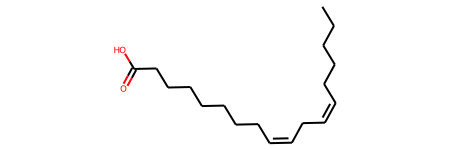

In [53]:
# The query structure
print(cox_ligand_hits[145][0])
cox_ligands[cox_ligand_hits[145][0]]

Jedná se o dlouhý alifatický řetězec :) Podívejme se, na hity: 

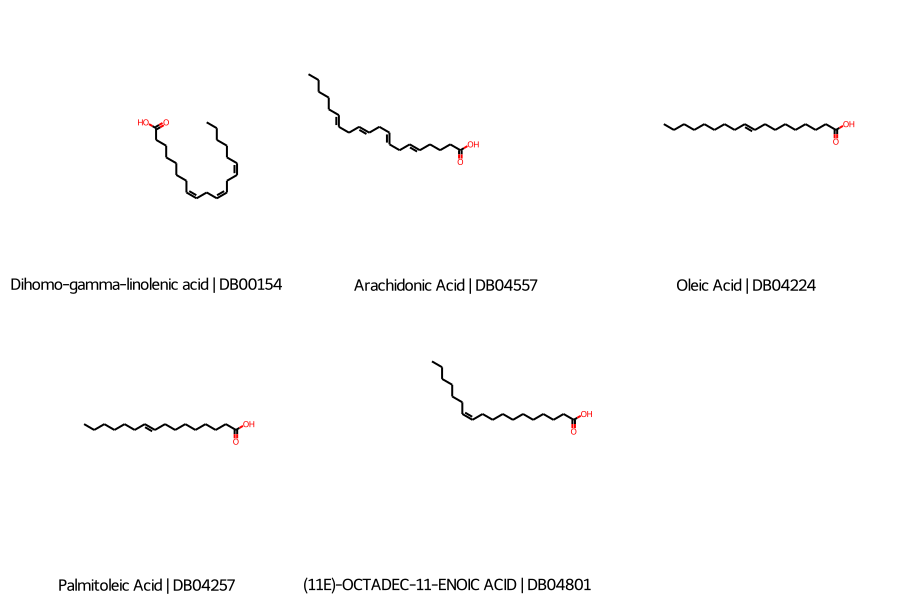

In [54]:
# And the DrugBank hits to that
hit_mols = [drugs[index] for index, similarity in cox_ligand_hits[145][1]]
Draw.MolsToGridImage(hit_mols, molsPerRow=3, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in hit_mols])

Ano, hity v DrugBank jsou také dlouhé alifatické řetězce s funkční COOH skupinou, jsou docela podobné tomu ve skutečnosti. 

Úplnou shodu s cox ligandem 145 má ve skutečnosti dihomo-gamma-linoleová kyselina (DHLA), DHLA je převedena do prostaglandinu E1 (PGE1), který inhibuje agregaci krevních destiček (proti srážlivosti krve) a také působí vazodilatačně (rozšíření cév).

DHLA je prekurzorem v syntéze ři prostaglandinu E1 (PGE1) i prostaglandinů řady 3. Slouží také jako prekurzor při syntéze kyseliny eikosapentaenové (EPA). EPA je prekurzorem prostaglandinů řady 3, leukotrienů řady 5 a tromboxanů řady 3. Tyto eikosanoidy mají antitrombogenní, protizánětlivý a antiaterogenní (proti vzniku aterosklerózy) vlastnosti. PGE1 inhibuje agregaci krevních destiček a má vazodilatační účinek. Bylo také prokázáno, že DHLA snižuje produkci / aktivitu tumor nekrózy (tumor necrois) faktoru alfa.Další dva zásahy jako arachidonová kyselina, oleová kyselina ... jsou velmi podobné, arachidonová je určitě podobná i funkcí.

To jsou tři přístupy z jedné struktury dotazu. Pojďme se podívat na všechny hity DrugBank ze všech ligandů dotazu cox:

In [55]:
import operator
x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}


# to jsou molekuly a jejich pocet hitu celkem v DrugBank 
drugs_hitcounts = {}
for ligand, hits in cox_ligand_hits:
    for hit, similarity in hits:
        drugs_hitcounts[hit] = drugs_hitcounts.get(hit, 0) + 1
sorted(drugs_hitcounts.items(), key=operator.itemgetter(1))

[(6821, 1),
 (701, 1),
 (1429, 1),
 (352, 1),
 (5344, 1),
 (816, 1),
 (1615, 1),
 (46, 1),
 (4052, 1),
 (3757, 1),
 (3787, 1),
 (4274, 1),
 (486, 1),
 (6413, 1),
 (628, 1),
 (206, 1),
 (356, 1),
 (3498, 1),
 (695, 1),
 (3169, 1),
 (560, 1),
 (3971, 1),
 (125, 1),
 (145, 1),
 (764, 1),
 (4648, 1),
 (752, 1),
 (1638, 1),
 (843, 1),
 (3387, 1),
 (387, 1),
 (458, 1),
 (4047, 1),
 (485, 1),
 (6928, 2),
 (4458, 2),
 (4672, 2),
 (6845, 2),
 (633, 2),
 (704, 2),
 (6933, 2),
 (1146, 2),
 (4202, 2),
 (819, 2),
 (668, 2),
 (870, 3),
 (1983, 3),
 (439, 4),
 (697, 5),
 (888, 5),
 (6930, 5),
 (596, 5),
 (4449, 5),
 (671, 6),
 (2391, 6),
 (4416, 7),
 (1412, 7),
 (465, 8),
 (825, 8),
 (471, 10),
 (4218, 11),
 (928, 14),
 (6929, 14),
 (418, 37),
 (5831, 68),
 (218, 69),
 (369, 86)]

In [56]:
# serazeni molekul podle poctu hitu v DrugBank
ordered_drugs_hitcounts = sorted(drugs_hitcounts.keys(), key=lambda x: drugs_hitcounts[x], reverse=True)
ordered_drugs_hitcounts

[369,
 218,
 5831,
 418,
 928,
 6929,
 4218,
 471,
 465,
 825,
 4416,
 1412,
 671,
 2391,
 697,
 888,
 6930,
 596,
 4449,
 439,
 870,
 1983,
 6928,
 4458,
 4672,
 6845,
 633,
 704,
 6933,
 1146,
 4202,
 819,
 668,
 6821,
 701,
 1429,
 352,
 5344,
 816,
 1615,
 46,
 4052,
 3757,
 3787,
 4274,
 486,
 6413,
 628,
 206,
 356,
 3498,
 695,
 3169,
 560,
 3971,
 125,
 145,
 764,
 4648,
 752,
 1638,
 843,
 3387,
 387,
 458,
 4047,
 485]

In [57]:
# vykresleni serazenych molekul, ktere meli v DrugBanku hity
# jmeno, drugbank ID, pocet hitu
hit_mols = [drugs[i] for i in ordered_drugs_hitcounts]
Draw.MolsToGridImage(hit_mols, molsPerRow=2, subImgSize=(500,500),
                     legends=["{} | {} | {}".format(drugs[i].GetProp('GENERIC_NAME')[:30], # just cut off too long IUPAC stuff
                                                    drugs[i].GetProp('DRUGBANK_ID'),
                                                    drugs_hitcounts[i])
                              for i in ordered_drugs_hitcounts])

/home/simik/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


Při dotazování na známé cox ligandy pomocí ECFP4-1024 jsou nejčastěji zasaženými látkami v databázi DrugBank Celecoxib, IndomethacinRofexocib, Ibuprofen, Diclofenac, ... různými hity. Jedná se o skutečné inhibitory COX, které se již používají jako léky většinou proti bolesti, zánětu.

Kyselina acetylsalicylová, jinak zvaný aspirin, asi nejběžnější analgetická a antipyretická medikamence. Caprofen, Salicylová kyselina, dihomo-gama-linoleová kyselina, arachidonová kyselina, atd.


Například mezi nejnižším hitem je Tenoxicam, jedná se o protizánětlivý prostředek s analgetickými a antipyretickými vlastnostmi, používá se k léčbě osteoartrózy a tlumení akutní bolesti.

# Výběr rozmanitosti

Nalezení molekul, které jsou strukturně podobné našemu dotazu, je velmi užitečné a skutečně velmi často používané, ale není to jediný způsob, jak prakticky využít koncept strukturní podobnosti. Někdy je problém velmi odlišný. Často existuje scénář, kdy máme velkou sadu kandidátských struktur a omezený čas/zdroje/peníze/zařízení na jejich modelování/přípravu/nákup/testování. Výpočtově drahý model, který dokáže realisticky zpracovat jen zlomek všech vašich virtuálních sloučenin. Omezený rozpočet na nákup látek. Nevrlý a již přepracovaný syntetický chemik.

V těchto případech chcete upřednostnit ty struktury vaší sady, které mají potenciál být nejužitečnější. To se obvykle provádí pomocí rychlejších výpočetních přístupů méně náročných na zdroje. Za jiných podmínek si však také chcete zachovat chemickou rozmanitost ve vaší sadě kandidátských struktur. Testování 1 000. varianty stejné základní struktury může být v raných fázích screeningu ztrátou času, chemici to udělají v pozdějších fázích vedoucího vývoje, a to pro ty nejlepší kandidáty.

Při screeningu je často výhodné vzorkovat velkou sadu struktur způsobem, který pokrývá co nejvíce chemické rozmanitosti sady v co nejmenším počtu chemických struktur. Strukturální rozmanitost je často definována jako inverzní k jejich strukturní podobnosti. Pojďme implementovat takovou inverzi podobnosti Tanimota, svého druhu „strukturní vzdálenost“:

In [59]:
def distance_function(index1, index2, *args, fingerprints=cox_ligands_ecfp,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(fingerprints[index1],
                                                 fingerprints[index2],
                                                 metric=metric)

Pomocí této funkce na vzdálenost můžeme vybrat struktury z naší množiny tak, že náhodně vybereme první strukturu, druhou strukturu jako nejvzdálenější od první, třetí struktura bude ta nejvzdálenější od předchozích dvou, čtvrtá jeden nejvzdálenější od předchozích tří atd. atd., dokud nebudeme mít naši rozmanitou reprezentativní podmnožinu zvolené velikosti. Toto přepočítání vzdálenosti však může být docela drahé, zejména pro větší množinu látek. Možná za několik tisíc struktur, ale zkuste miliardu a zoufalství. Existují však některá implementace, které využívají heuristiku, aby byl tento výběr mnohem rychlejší. Není zaručeno, že poskytnou absolutně optimální pokrytí, ale jejich téměř optimální řešení jsou v praxi naprosto v pořádku a jejich výpočet je mnohem rychlejší. RDKit implementuje takové sběrače, nejvíce pozoruhodně sběrač MaxMin [zde pěkně popsaný](https://rdkit.blogspot.com/2017/11/revisting-maxminpicker.html). Pojďme to použít na naší sadě ligandů a vezměte si asi 1% různorodou podmnožinu na základě vzdálenosti mezi jejich vektory ECFP:

In [60]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(cox_ligands), 45))
picked

[2890,
 2757,
 125,
 2068,
 2955,
 2540,
 420,
 1105,
 2623,
 1835,
 1947,
 654,
 392,
 1587,
 863,
 832,
 1460,
 2508,
 3187,
 445,
 1682,
 836,
 517,
 2572,
 752,
 2333,
 698,
 2570,
 2842,
 1515,
 2973,
 3114,
 88,
 213,
 534,
 191,
 834,
 2662,
 254,
 1935,
 2632,
 323,
 1638,
 2322,
 753]

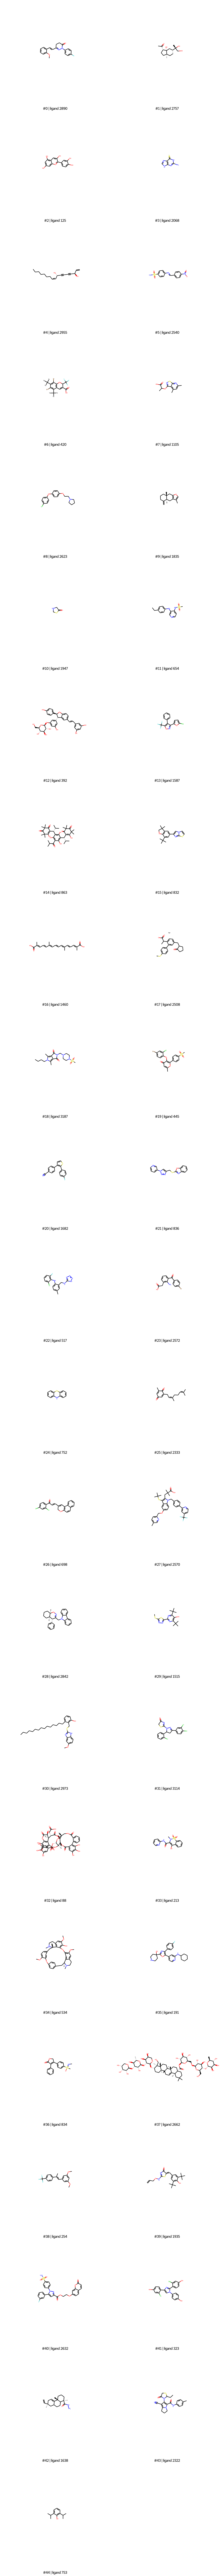

In [61]:
Draw.MolsToGridImage([cox_ligands[i] for i in picked], molsPerRow=2, subImgSize=(500,500),
                     legends=["#{} | ligand {}".format(i, hit) for i, hit in enumerate(picked)])

To vypadá docela různorodě :) Struktura se 3 šestičlennými kruhy spojená linkery, následovaná strukturou se dvěma kruhy pětičleným a šestičleným a následované dalšími odlišnými strukturami. To ukazuje schopnost sběrače pokrýt velké množství chemické rozmanitosti sady v relativně malém množství struktur.

Pokud zjistíte, že máte omezené zdroje na zpracování všech sloučenin ve vaší sadě, nebo pokud chcete jen dobrou testovací podmnožinu svého hlavního chodu, určitě je třeba zvážit nějakou formu výběru rozmanitosti.